# Capstone Project - The Battle of Neighborhoods

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, we will try to find an optimal location for opening a new hotel near the **RTP(Research Triangle Park)** area in North Carolina, USA. Specifically, we will explore the neighborhoods in **Raleigh, North Carolina**, the capital city of North Carolina which is among the three cities it is mainly comprised of.

We will try to find neighborhoods which have **no or less number** of already existing hotels but have a fair amount of **things to do or places to eat** in the vicinity so that the visitors find the location optimal for their needs.

We will try to generate a few most promising neighborhoods based on this criteria. This report will be targeted to stakeholders so that they can chose the best possible final location for opening the hotel.

## Data <a name="data"></a>

The data that will be required to solve our problem is:
* number of already existing hotels in the neighborhood.
* number of venues(any) in the neighborhood

We have extracted the list of Raleigh neighborhoods from the Wikipedia [page](https://en.wikipedia.org/wiki/Raleigh,_North_Carolina_neighborhoods).

We will further need the following data sources to extract the required information:
* coordinates will be obtained using Geopy Geocoder **Nominatim** and for the neighborhoods for which no result is obtained, we will make use of the online geographic tool **[latlong.net](https://www.latlong.net)**
* number and details of already existing hotels will be obtained using **Foursquare API**.
* explore and find the number of venues nearby using **Foursquare API**.


Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
# Data analysis libraries
import numpy as np
import pandas as pd

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Visualization libraries
import folium   # map rendering library
import seaborn as sns

#Clustering modules
from sklearn.cluster import KMeans

#Geopy module
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
print('Libraries imported.')

Libraries imported.


### Download Data 

The Wikipedia page contains only the list of neighborhoods. we will be extracting the list and then fetching their location coordinates using the Nominatim.

I have copied and stored the list of neighborhoods along with their corresponding regions in the file - **raleigh.xlsx**. Lets read it into a pandas dataframe.

In [92]:
raleigh_neighborhoods = pd.read_excel('raleigh.xlsx')

Let's take a quick look at the data.

In [93]:
raleigh_neighborhoods.head()

,Region,Neighbourhood
0,Beltline,Anderson Heights
1,Beltline,Avent West
2,Beltline,Belvidere Park
3,Beltline,Battery Heights
4,Beltline,Bloomsbury


To get the coordinates for the neighborhoods using the geocoder, we need to define an instance of the geocoder for which we further need to define a user_agent. We will define the user agent as *raleigh_explorer*.

In [4]:
# Create an instance of geocoder
geolocator = Nominatim(user_agent="raleigh_explorer")

Next, we'll loop through our raleigh_neighborhoods dataframe to get coordinates for each neighborhood and append them to the dataframe itself. There are instances when the geocoder may not fetch the coordinates, we'll replace those values with None for now.

In [5]:
# Get location coordinates for all the neighborhoods
for i,hood in zip(raleigh_neighborhoods.index,raleigh_neighborhoods.Neighbourhood):
    address = '{}, Raleigh, North Carolina'.format(hood)
    location = geolocator.geocode(address)
    if location:
        raleigh_neighborhoods.loc[i,'Latitude'] = location.latitude
        raleigh_neighborhoods.loc[i,'Longitude'] = location.longitude
    else:
        raleigh_neighborhoods.loc[i,'Latitude'] = None
        raleigh_neighborhoods.loc[i,'Longitude'] = None

Let's have a look at the dataframe now.

In [6]:
raleigh_neighborhoods

,Borough,Neighbourhood,Latitude,Longitude
0,Beltline,Anderson Heights,35.817863,-78.637782
1,Beltline,Avent West,NaN,NaN
2,Beltline,Belvidere Park,35.798775,-78.619352
3,Beltline,Battery Heights,35.777058,-78.617563
4,Beltline,Bloomsbury,35.808897,-78.648599
5,Beltline,Boylan Heights,35.774159,-78.652102
6,Beltline,Cameron Park,35.785779,-78.655470
7,Beltline,Cameron Village,35.794548,-78.656789
8,Beltline,Capitol District,NaN,NaN
9,Beltline,Capitol Heights,35.789884,-78.621851


We see that there are a few NaN values. I have looked them up from the website - **latlong.net** and stored the values in the file - **raleigh_location.xlsx**. Let's read them into the dataframe.

In [94]:
raleigh_neighborhoods = pd.read_excel('raleigh_location.xlsx')

Let's have a look at the data.

In [3]:
raleigh_neighborhoods

,Region,Neighbourhood,Latitude,Longitude
0,Beltline,Anderson Heights,35.817863,-78.637782
1,Beltline,Avent West,35.778662,-78.716634
2,Beltline,Belvidere Park,35.798775,-78.619352
3,Beltline,Battery Heights,35.777058,-78.617563
4,Beltline,Bloomsbury,35.808897,-78.648599
5,Beltline,Boylan Heights,35.774159,-78.652102
6,Beltline,Cameron Park,35.785779,-78.655470
7,Beltline,Cameron Village,35.794548,-78.656789
8,Beltline,Capitol District,35.806408,-78.711182
9,Beltline,Capitol Heights,35.789884,-78.621851


Let's check the size of our dataframe.

In [3]:
raleigh_neighborhoods.shape

(105, 4)

Let's check if there are any NaN values left in the dataframe.

In [95]:
raleigh_neighborhoods[raleigh_neighborhoods.isnull().any(axis=1)]

,Region,Neighbourhood,Latitude,Longitude
36,Beltline,West Raleigh Historic District,NaN,NaN
57,North Raleigh,New Hope,NaN,NaN


The above neighborhoods upon further online research were found to be mainly non-commercial ones and hence are not useful in our analysis. So we'll drop the corresponding rows.

In [97]:
raleigh_neighborhoods.dropna(inplace=True)

Let's recheck the shape of the dataframe.

In [98]:
raleigh_neighborhoods.shape

(103, 4)

In [99]:
print('The dataframe has {} regions and {} neighborhoods.'.format(
        len(raleigh_neighborhoods['Region'].unique()),
        raleigh_neighborhoods.shape[0]
    )
)

The dataframe has 4 regions and 103 neighborhoods.


Let's visualize the map of Raleigh with neighborhoods superimposed on top.

First, let's get the location coordinates of Raleigh using Nominatim.

In [100]:
address = 'Raleigh, North Carolina'

geolocator = Nominatim(user_agent="raleigh_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Raleigh are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Raleigh are 35.7803977, -78.6390989.


Now, let's create the map of Raleigh.

In [101]:
# create map of Raleigh using latitude and longitude values
map_raleigh = folium.Map(location=[latitude, longitude], zoom_start=12)

# add neighborhood markers to map
for lat, lng, label in zip(raleigh_neighborhoods['Latitude'], raleigh_neighborhoods['Longitude'], raleigh_neighborhoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_raleigh)  
    
map_raleigh

### Foursquare API

Now, let's utilize the Foursquare API to explore the neighborhoods and segment them.

Let's define the credentials and version for Foursquare API.

In [102]:
# @hidden_cell
CLIENT_ID = 'KSJB25KBQSV3P00KCLICRIYST2PMTZ4RVQWGJDGWLUEOBJSE' # your Foursquare ID
CLIENT_SECRET = 'ZTI2RGW3KR00KOMYT53LQF1LEWJZBE3DXRMZ4CH5ERRO0QVW' # your Foursquare Secret
VERSION = '20180604'

#### Extract existing hotel information

Now, let's get the list of already existing hotels in the neighborhoods. The category id for the hotel category has been extracted from the Foursquare website.

For some hotel entries where the category was not explicitly mentioned in the json, we have named the category for them as 'Hotel_Inn'.

In [103]:
hotel_category = '4bf58dd8d48988d1fa931735' # category id for all types of hotels

def getNearbyHotels(names, latitudes, longitudes, radius=4000):
    
    venues_list=[]
    hotels_count = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            lat, 
            lng,
            VERSION,
            hotel_category,
            radius)
            
        # make the GET request
        results = requests.get(url).json()
        results = results['response']['venues']
        
        # return only relevant information for each nearby venue
        try:
            venues_list.append([(name,
                v['id'], 
                v['name'],
                v['location']['formattedAddress'],
                v['location']['lat'],
                v['location']['lng'],
                v['location']['distance'],
                v['categories'][0]['name']) for v in results])
        except:
            venues_list.append([(name,
                v['id'], 
                v['name'],
                v['location']['formattedAddress'],
                v['location']['lat'],
                v['location']['lng'],
                v['location']['distance'],
                'Hotel_Inn') for v in results])

    nearby_hotels = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_hotels.columns = ['Neighbourhood','Id', 
                  'Name', 
                  'Address', 
                  'Latitude', 
                  'Longitude',
                  'Distance','Category']
    
    return(nearby_hotels)

Let's now go over our neighborhood locations and get nearby hotels; we'll save the information in the dataframe, **raleigh_hotels**.

In [104]:
# Try to load from local file system in case we did this before
try:
    raleigh_hotels = pd.read_pickle('raleigh_hotels.pkl')
except:
    raleigh_hotels = getNearbyHotels(names=raleigh_neighborhoods['Neighbourhood'],
                                   latitudes=raleigh_neighborhoods['Latitude'],
                                   longitudes=raleigh_neighborhoods['Longitude']
                                  )
    # Save the result to local file system.
    raleigh_hotels.to_pickle('raleigh_hotels.pkl')

Let's check the shape of the resulting dataframe. Let's also print out the first few rows of the dataframe.

In [105]:
raleigh_hotels.shape

(3119, 8)

In [106]:
raleigh_hotels.head()

,Neighbourhood,Id,Name,Address,Latitude,Longitude,Distance,Category
0,Anderson Heights,5b338e832a7ab6002c75d7d0,Comfort Inn Raleigh Midtown,"[1001 Wake Towne Dr, Raleigh, NC 27609, United...",35.824470,-78.624070,1439,Hotel
1,Anderson Heights,56e73487498e53fd654e55ef,courtyard,"[Raleigh, NC, United States]",35.834861,-78.673948,3772,Hotel
2,Anderson Heights,5367bfb7498ec156685fe45b,Hilton Garden Inn Raleigh /Crabtree Valley,"[3912 Arrow Dr, Raleigh, NC 27612, United States]",35.835510,-78.673219,3753,Hotel
3,Anderson Heights,4ad4c008f964a520b7ec20e3,Raleigh Marriott Crabtree Valley,[4500 Marriott Drive (at Creedmoor Rd & Glenwo...,35.842902,-78.678044,4579,Hotel
4,Anderson Heights,4bc37c7adce4eee189a0719d,Courtyard Raleigh Crabtree Valley,"[3908 Arrow Drive, Raleigh, NC 27612, United S...",35.835099,-78.673796,3774,Hotel


Since the neighborhoods were nearby there could be some duplicate entries in the dataframe. We'll remove the duplicate entries using the function find_duplicates. The entries will be removed based on the distance parameter, the entry with larger distance parameter with its neighborhood will be removed and the smaller one will be kept.

In [107]:
def find_duplicates(df):
    id_to_neighborhood = {}
    
    # create dictionary for unique ids with values for all neighborhood,distance tuples
    for venue_id,hood,distance in zip(df['Id'],df['Neighbourhood'],df['Distance']):
        if venue_id not in id_to_neighborhood:
            id_to_neighborhood[venue_id] = [(hood,distance)]
        else:
            id_to_neighborhood[venue_id].append((hood,distance))
    
    final_df = {}
    
    # select the neighborhood with minimum distance value
    for key,value in id_to_neighborhood.items():
        data = min(value,key = lambda x:x[1])
        final_df[key] = data
    final_df = pd.DataFrame.from_dict(final_df,orient = 'index',columns = ['Neighbourhood','Distance'])
    final_df.reset_index(inplace=True)
    final_df.rename(columns={"index":"Id"},inplace=True)
    return final_df 

Now, let's store the distinct hotel entries in the **final_hotels** dataframe.

In [108]:
final_hotels = find_duplicates(raleigh_hotels)
final_hotels

,Id,Neighbourhood,Distance
0,5b338e832a7ab6002c75d7d0,Anderson Heights,1439
1,56e73487498e53fd654e55ef,Crabtree Valley,631
2,5367bfb7498ec156685fe45b,Crabtree Valley,658
3,4ad4c008f964a520b7ec20e3,Crabtree Valley,599
4,4bc37c7adce4eee189a0719d,Crabtree Valley,630
5,4bd2330f462cb7134fe1db07,Glenwood South,461
6,4d70f00ecbc58cfaffc67972,Timberlake,1053
7,4ad4c008f964a520b3ec20e3,Crabtree Valley,780
8,4bc40e16dce4eee1d6e7719d,Crabtree Valley,597
9,5494091f498ed65f02f409ed,Warehouse District,566


Now, let's merge the dataframe with distinct hotel entries(**final_hotels**) back with the raleigh_hotels dataframe to get all the relevant information in one dataframe.

In [109]:
# List of the columns needed in the final dataframe.
cols = ['Id','Neighbourhood','Name','Address','Latitude','Longitude','Distance_x','Category']
raleigh_hotels = pd.merge(final_hotels,raleigh_hotels,on=["Id",'Neighbourhood'],how="inner")[cols].rename(columns=lambda x: x.split('_')[0])
raleigh_hotels.head()

,Id,Neighbourhood,Name,Address,Latitude,Longitude,Distance,Category
0,5b338e832a7ab6002c75d7d0,Anderson Heights,Comfort Inn Raleigh Midtown,"[1001 Wake Towne Dr, Raleigh, NC 27609, United...",35.824470,-78.624070,1439,Hotel
1,56e73487498e53fd654e55ef,Crabtree Valley,courtyard,"[Raleigh, NC, United States]",35.834861,-78.673948,631,Hotel
2,5367bfb7498ec156685fe45b,Crabtree Valley,Hilton Garden Inn Raleigh /Crabtree Valley,"[3912 Arrow Dr, Raleigh, NC 27612, United States]",35.835510,-78.673219,658,Hotel
3,4ad4c008f964a520b7ec20e3,Crabtree Valley,Raleigh Marriott Crabtree Valley,[4500 Marriott Drive (at Creedmoor Rd & Glenwo...,35.842902,-78.678044,599,Hotel
4,4bc37c7adce4eee189a0719d,Crabtree Valley,Courtyard Raleigh Crabtree Valley,"[3908 Arrow Drive, Raleigh, NC 27612, United S...",35.835099,-78.673796,630,Hotel


Let's check the shape of the resulting dataframe.

In [110]:
raleigh_hotels.shape

(231, 8)

Let's visualize the distribution of hotels on the map.

In [111]:
hotels_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Raleigh

# add the hotels as red circle markers
for lat, lng, label,neighborhood in zip(raleigh_hotels['Latitude'], raleigh_hotels['Longitude'], raleigh_hotels['Name'],raleigh_hotels['Neighbourhood']):
    label = '{} ({})'.format(label,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6,
        parse_html=False).add_to(hotels_map)

# display map
hotels_map

Let's group the hotels in different clusters and visualize them along with neighborhood markers to get a better idea of how hotels are distributed.

In [112]:
from folium import plugins

hotels_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around Raleigh

hotels = plugins.MarkerCluster().add_to(hotels_map)

# add blue circle markers to represent the neighborhoods
for lat, lng, label in zip(raleigh_neighborhoods['Latitude'], raleigh_neighborhoods['Longitude'], raleigh_neighborhoods['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        [lat, lng],
        radius=100,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6,
        parse_html=False).add_to(hotels_map)

# add the hotels markers
for lat, lng, label,neighborhood in zip(raleigh_hotels['Latitude'], raleigh_hotels['Longitude'], raleigh_hotels['Name'],raleigh_hotels['Neighbourhood']):
    label = '{} ({})'.format(label,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label,
        icon=folium.Icon(color='red',icon='home')).add_to(hotels)

# display map
hotels_map

As we see from the map there are a few regions which are not saturated with hotels yet and could be of interest.

Now, let's group the hotels based on the neighborhood to get better idea of the distribution of hotels in each neighborhood.

In [113]:
hotel_counts = raleigh_hotels.groupby('Neighbourhood')['Id'].count().to_frame().reset_index().rename(columns={'Id':'Hotel_Count'})
hotel_counts.head()

,Neighbourhood,Hotel_Count
0,Anderson Heights,4
1,Asbury,4
2,Boylan Heights,1
3,Brandywine,4
4,Brentwood Estates,3


We'll merge the counts in the raleigh_neighborhoods dataframe and fill zero where there are no hotels.

In [114]:
# Merge the hotel counts with neighborhoods data
raleigh_neighborhoods = pd.merge(raleigh_neighborhoods,hotel_counts,on="Neighbourhood",how="left").fillna(0)
raleigh_neighborhoods

,Region,Neighbourhood,Latitude,Longitude,Hotel_Count
0,Beltline,Anderson Heights,35.817863,-78.637782,4.0
1,Beltline,Avent West,35.778662,-78.716634,0.0
2,Beltline,Belvidere Park,35.798775,-78.619352,0.0
3,Beltline,Battery Heights,35.777058,-78.617563,0.0
4,Beltline,Bloomsbury,35.808897,-78.648599,0.0
5,Beltline,Boylan Heights,35.774159,-78.652102,1.0
6,Beltline,Cameron Park,35.785779,-78.655470,0.0
7,Beltline,Cameron Village,35.794548,-78.656789,0.0
8,Beltline,Capitol District,35.806408,-78.711182,1.0
9,Beltline,Capitol Heights,35.789884,-78.621851,0.0


Let's visualize the top 50 neighborhoods with the highest number of hotel counts.

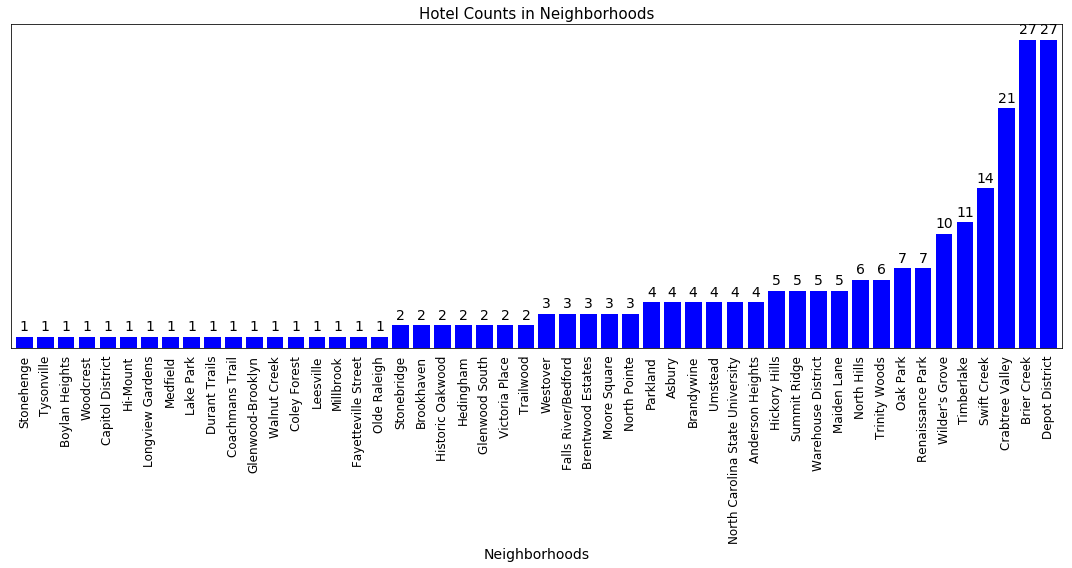

In [46]:
# Get the top 50 neighborhoods
counts = raleigh_neighborhoods.sort_values(by=['Hotel_Count'])[-50:]

fig, ax = plt.subplots(figsize=(15, 8))

labels = counts['Neighbourhood']
total_hotels = counts['Hotel_Count']
x = np.arange(len(labels))

# plot the bar chart
ax = total_hotels.plot(kind='bar', rot=90, width = 0.8, color=[ 'blue'])

# Put text labels on bars
rects = ax.patches
for rect, count in zip(rects, total_hotels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.3, int(count),
            ha='center', va='bottom', fontsize=14)

ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True) # remove borders
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title('Hotel Counts in Neighborhoods',fontsize=15) 
ax.set(xticks=x, xticklabels=labels)
ax.set_xlabel('Neighborhoods',fontsize=14)

fig.tight_layout()
plt.show()

#### Explore the neighborhood venues

Now, we have the number of hotels in the neighborhoods, we also need data about the nearby things to do or places to eat in the respective neighborhoods since the hotels should be in the vicinity of those. Hence, we'll collect the data about the venues in the neighborhoods to find the location optimal for visitor's needs.

We'll again use Foursquare API to explore the neighborhoods and get the venues using the function *getNearbyVenues*.

In [115]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        for v in results:
            try:
                venues_list.append([(
                    name,
                    v['venue']['id'], 
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],
                    v['venue']['location']['distance'],
                    v['venue']['categories'][0]['name'])])
            except:
                venues_list.append([(
                    name,
                    v['venue']['id'], 
                    v['venue']['name'], 
                    v['venue']['location']['lat'], 
                    v['venue']['location']['lng'],
                    v['venue']['location']['distance'],
                    np.nan)])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                             'Id', 
                             'Venue', 
                             'Venue_Latitude', 
                             'Venue_Longitude',
                             'Distance', 
                             'Venue_Category']
    
    return(nearby_venues)

Let's now go over our neighborhood locations and get nearby venues; we'll save the information in the dataframe, **raleigh_venues**.

In [116]:
# Try to load from local file system in case we did this before
try:
    raleigh_venues = pd.read_pickle('raleigh_venues.pkl')
except:
    raleigh_venues = getNearbyVenues(names=raleigh_neighborhoods['Neighbourhood'],
                                   latitudes=raleigh_neighborhoods['Latitude'],
                                   longitudes=raleigh_neighborhoods['Longitude'])
    # Save the result to local file system.
    raleigh_venues.to_pickle("raleigh_venues.pkl")

Let's check the shape of the resulting dataframe. Let's also print out the first few rows of the dataframe.

In [117]:
raleigh_venues.shape

(1939, 7)

In [118]:
raleigh_venues.head()

,Neighbourhood,Id,Venue,Venue_Latitude,Venue_Longitude,Distance,Venue_Category
0,Anderson Heights,4d45a17014aa8cfa5e4e743d,Fallon Park,35.815168,-78.637047,307,Park
1,Anderson Heights,517abc13e4b03fca3ead4a0c,Crabtree Creek Trailhead,35.821286,-78.634901,461,Trail
2,Anderson Heights,4d7a162626c260fc5d3fbf3c,Rothgeb Park,35.820791,-78.643438,605,Park
3,Anderson Heights,4e00dda262e12fb08938acb2,Crabtree Creek Trail Entrance @ Marlowe,35.823670,-78.639982,676,Trail
4,Anderson Heights,4ea82f090aaf6e058655d91f,Calibre Chase Gym,35.820212,-78.630409,715,Gym


Just like the hotels, there could be some duplicate venue entries. Hence, we'll use the find_duplicates function to remove the duplicates. 

In [119]:
final_venues = find_duplicates(raleigh_venues)
final_venues

,Id,Neighbourhood,Distance
0,4d45a17014aa8cfa5e4e743d,Anderson Heights,307
1,517abc13e4b03fca3ead4a0c,Anderson Heights,461
2,4d7a162626c260fc5d3fbf3c,Anderson Heights,605
3,4e00dda262e12fb08938acb2,Drewry Hills,532
4,4ea82f090aaf6e058655d91f,Anderson Heights,715
5,4c7175cf1f58199c331d407c,Hi-Mount,705
6,4d4c62a4855b5481d63ae78f,Avent West,672
7,4b8ac202f964a520097f32e3,Asbury,308
8,4bddf6f1e75c0f47ce54c603,Avent West,250
9,4d8e1c93d00a6ea8724fb14f,Westover,716


Now, let's merge the dataframe with distinct venue entries(final_venues) to the raleigh_venues dataframe to get all the relevant information in one dataframe.

In [120]:
# List of the columns needed in the final dataframe.
cols = ['Id','Neighbourhood','Venue','Venue_Latitude','Venue_Longitude','Distance_x','Venue_Category']
raleigh_venues = pd.merge(final_venues,raleigh_venues,on=["Id",'Neighbourhood'],how="inner")[cols]
raleigh_venues.head()

,Id,Neighbourhood,Venue,Venue_Latitude,Venue_Longitude,Distance_x,Venue_Category
0,4d45a17014aa8cfa5e4e743d,Anderson Heights,Fallon Park,35.815168,-78.637047,307,Park
1,517abc13e4b03fca3ead4a0c,Anderson Heights,Crabtree Creek Trailhead,35.821286,-78.634901,461,Trail
2,4d7a162626c260fc5d3fbf3c,Anderson Heights,Rothgeb Park,35.820791,-78.643438,605,Park
3,4e00dda262e12fb08938acb2,Drewry Hills,Crabtree Creek Trail Entrance @ Marlowe,35.823670,-78.639982,532,Trail
4,4ea82f090aaf6e058655d91f,Anderson Heights,Calibre Chase Gym,35.820212,-78.630409,715,Gym


In [121]:
raleigh_venues.shape

(1315, 7)

Let's find out how many unique categories can be obtained from all the returned venues.

In [122]:
print('There are {} uniques categories.'.format(len(raleigh_venues['Venue_Category'].unique())))
print("List of categories:",raleigh_venues['Venue_Category'].unique())

There are 257 uniques categories.
List of categories: ['Park' 'Trail' 'Gym' 'Cosmetics Shop' 'Baseball Field' 'Clothing Store'
 'Discount Store' 'Fast Food Restaurant' 'Pool Hall' 'Sandwich Place'
 'Grocery Store' 'Pizza Place' 'Convenience Store' 'Gift Shop'
 'Music Store' 'Chinese Restaurant' 'Video Store' 'Shopping Plaza'
 'Seafood Restaurant' 'Hot Dog Joint' 'American Restaurant' 'Coffee Shop'
 'Gas Station' 'Flea Market' 'Gym / Fitness Center' 'ATM' 'Pawn Shop'
 'Bakery' 'Southern / Soul Food Restaurant' 'Caribbean Restaurant'
 'Fried Chicken Joint' 'Automotive Shop' 'Department Store'
 'Hardware Store' 'Music Venue' 'Lawyer' 'Scenic Lookout' 'Café'
 'Beer Garden' 'Indie Movie Theater' 'New American Restaurant' 'Bar'
 'Pharmacy' 'Bank' 'Salon / Barbershop' 'Art Gallery' 'Brewery'
 'Farmers Market' 'Beer Store' 'Lounge' 'Mexican Restaurant' 'Candy Store'
 'BBQ Joint' 'Nail Salon' 'Vegetarian / Vegan Restaurant'
 'Tapas Restaurant' 'Asian Restaurant' 'Art Museum' 'Whisky Bar'
 'Neig

Let's also group the venues based on neighborhoods to get the counts.

In [123]:
venue_counts = raleigh_venues.groupby('Neighbourhood')['Id'].count().reset_index(name='Venue_Count')
venue_counts

,Neighbourhood,Venue_Count
0,Anderson Heights,4
1,Asbury,4
2,Avent West,16
3,Battery Heights,11
4,Belvidere Park,10
5,Biltmore Hills,3
6,Bloomsbury,1
7,Boylan Heights,15
8,Brandywine,2
9,Brentwood Estates,25


Let's visualize the top 50 neighborhoods with the highest number of venue counts.

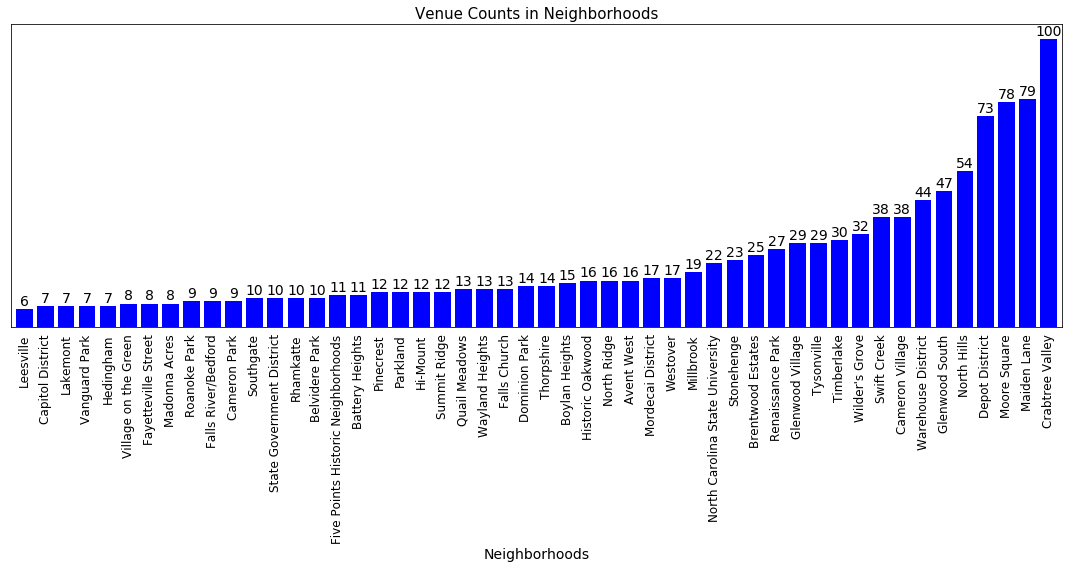

In [55]:
# Get the top 50 neighborhoods
counts = venue_counts.sort_values(by=['Venue_Count'])[-50:]

fig, ax = plt.subplots(figsize=(15, 8))
labels = counts['Neighbourhood']
total_venues = counts['Venue_Count']
x = np.arange(len(labels))

# plot the bar chart
ax = total_venues.plot(kind='bar', rot=90, width = 0.8, color=[ 'blue'])

# Put text labels on bars
rects = ax.patches
for rect, count in zip(rects, total_venues):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.3, count,
            ha='center', va='bottom', fontsize=14)

ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True) # remove borders
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title('Venue Counts in Neighborhoods',fontsize=15)
ax.set(xticks=x, xticklabels=labels)
ax.set_xlabel('Neighborhoods',fontsize=14)

fig.tight_layout()
plt.show()

Let's also have a look at how the venue counts are distributed overall.

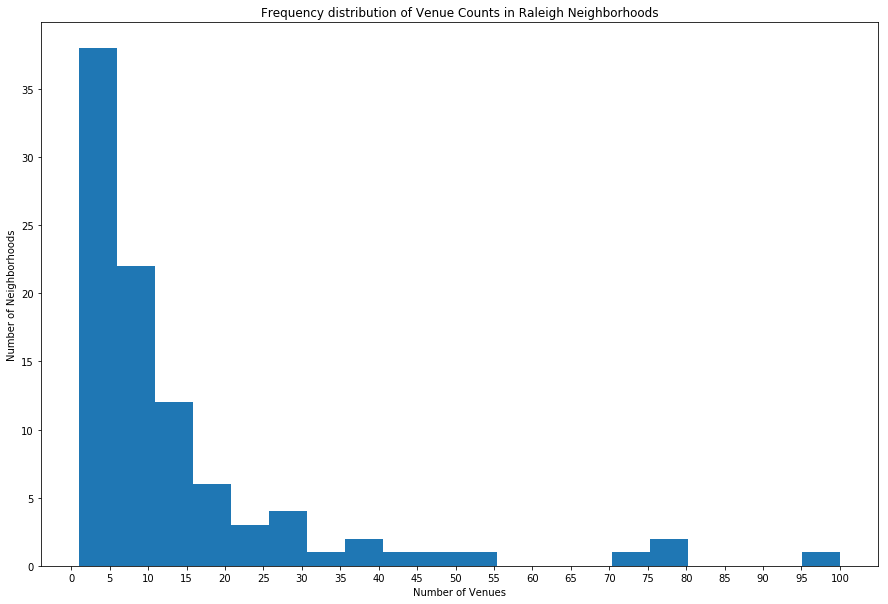

In [56]:
# Plot histogram
venue_counts['Venue_Count'].plot(kind='hist',figsize=(15,10),xticks=range(0,101,5),bins=20)

plt.title('Frequency distribution of Venue Counts in Raleigh Neighborhoods')
plt.ylabel('Number of Neighborhoods')
plt.xlabel('Number of Venues')
plt.show()

Looks like most of the neighborhood centers have a low concentration of venues and it will be difficult to find appropriate neighborhoods that have not been already saturated with hotels.

Let's get the final counts for existing hotels as well as venues in the *total_counts* dataframe.

In [124]:
total_counts = pd.merge(raleigh_neighborhoods,venue_counts,on="Neighbourhood",how="inner")
total_counts

,Region,Neighbourhood,Latitude,Longitude,Hotel_Count,Venue_Count
0,Beltline,Anderson Heights,35.817863,-78.637782,4.0,4
1,Beltline,Avent West,35.778662,-78.716634,0.0,16
2,Beltline,Belvidere Park,35.798775,-78.619352,0.0,10
3,Beltline,Battery Heights,35.777058,-78.617563,0.0,11
4,Beltline,Bloomsbury,35.808897,-78.648599,0.0,1
5,Beltline,Boylan Heights,35.774159,-78.652102,1.0,15
6,Beltline,Cameron Park,35.785779,-78.655470,0.0,9
7,Beltline,Cameron Village,35.794548,-78.656789,0.0,38
8,Beltline,Capitol District,35.806408,-78.711182,1.0,7
9,Beltline,Capitol Heights,35.789884,-78.621851,0.0,5


So, now we have all the data about existing hotels and nearby venues in the neighbourhoods and the respective counts as well.

This concludes our data gathering phase and we will now use this data to perform analysis to find optimal neighborhoods for the new hotel location.

## Methodology <a name="methodology"></a>

The project is designed to find optimal neighborhoods for the location of a new hotel in Raleigh, North Carolina. The neighborhoods should be such that there are a smaller number of already existing hotels so that the competition is not high but have a fair number of things to do in the vicinity.

The first step included the data collection and gathering phase in which we collected the data about the already existing hotels in the neighborhoods and their counts. We then also collected data about the number of nearby venues as well as their type in those neighborhoods.

The second step will include the data analysis part where first we will examine if there is any correlation in the number of hotels and number of venues in the neighborhoods.We will also identify the frequency of occurrence of various categories of venues existing in the neighborhoods.

In the next step, we will cluster the neighborhoods based on the type of venues as well as the counts of hotels and nearby venues and then find the cluster having higher number of venue categories and counts which are generally of interest to visitors like restaurants, stores, attractions,etc. We will visualize the resulting categories/counts on a bar chart to identify the promising cluster of neighborhoods.

In the final step, from the identified cluster we will extract the list of neighborhoods that meet our criteria of less than or equal to three hotels and more than 19 venues in the vicinity. We will present the map of identified neighborhoods to visually see if the neighborhoods are in diverse locations. These neighborhood centers could be the starting point for further exploration and finding the best possible location.

Obviously, choosing the final location will depend on various other factors like real estate prices, availability of space,etc. but this could be a good point to start.

## Analyze the Neighborhoods <a name="analysis"></a>

First, let's visualize how the number of hotels and venues in a neighbourhood might be related to each other.

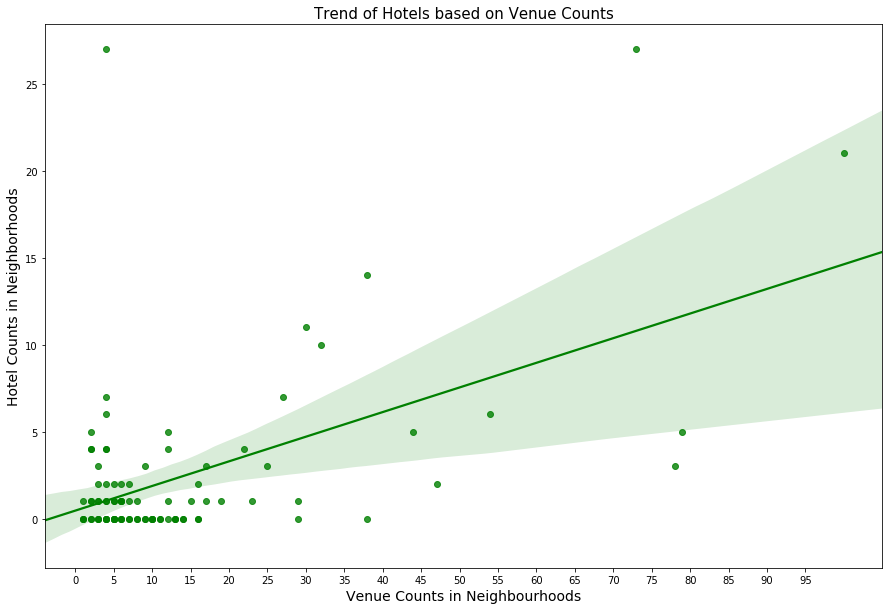

In [57]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='Venue_Count', y='Hotel_Count', data=total_counts, color='green')
ax.set(xticks=range(0,100,5))
ax.set_xlabel('Venue Counts in Neighbourhoods',fontsize=14)
ax.set_ylabel('Hotel Counts in Neighborhoods',fontsize=14) 
ax.set_title('Trend of Hotels based on Venue Counts',fontsize=15) # add title
plt.show()

From the plot above, we can see that with an increase in the number of venues in neighbourhoods, the number of hotels tend to increase. Also, there appears to be a few neighbourhoods where the number of hotels is less although the number of nearby venues are more. These are the neighbourhoods we are interested in. From the plot, we can estimate that neighborhoods having venue counts **more than or equal to 20** and having number of **hotels less than 4** will be a good fit. 

Now, since the number of venues could be made up of any type of venues, we will also need to group the neighbourhoods based on the type of venues so as to get a better idea of regions of interest to the visitors.

We will perform one hot encoding on the *raleigh_venues* dataframe to prepare our data for further analysis.

In [32]:
# one hot encoding
raleigh_onehot = pd.get_dummies(raleigh_venues[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
raleigh_onehot['Neighbourhood'] = raleigh_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [raleigh_onehot.columns[-1]] + list(raleigh_onehot.columns[:-1])
raleigh_onehot = raleigh_onehot[fixed_columns]

raleigh_onehot.head()

,Neighbourhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Drewry Hills,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anderson Heights,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's check the size of the new dataframe.

In [33]:
raleigh_onehot.shape

(1315, 258)

Let's first visualize what are the most common types of venues in Raleigh neighborhoods.

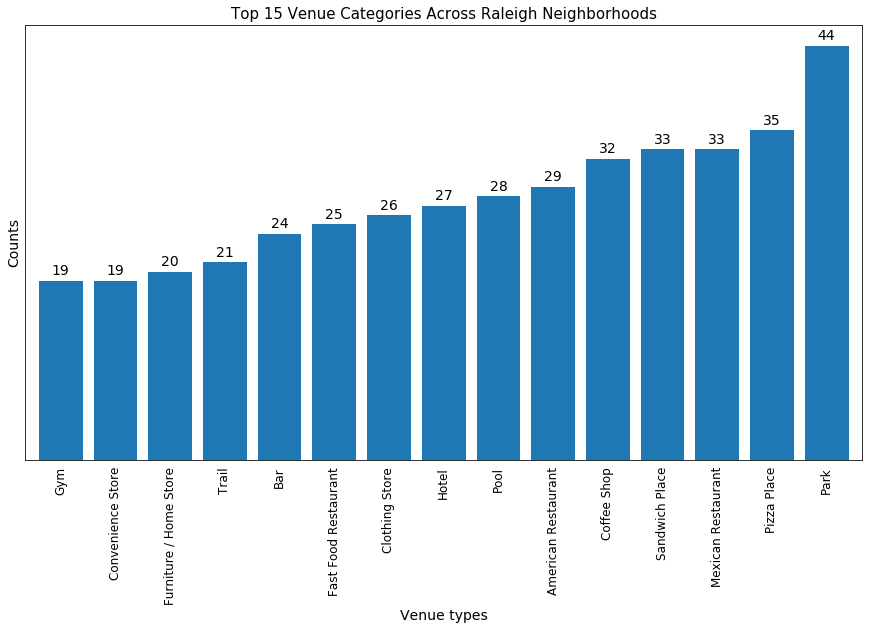

In [126]:
raleigh_counts = raleigh_onehot.groupby('Neighbourhood').sum().reset_index()
raleigh_counts = raleigh_counts.sum().rename('Count')

# Get the top 15 categories
raleigh_top15 = raleigh_counts.to_frame().drop('Neighbourhood').sort_values(by='Count')[-15:]


labels = raleigh_top15['Count']

# plot the bar chart
ax = raleigh_top15.plot(kind='bar', rot=90, width = 0.8,figsize=(15,8))

# Put text labels on bars
rects = ax.patches
for rect, count in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.3, count,
            ha='center', va='bottom', fontsize=14)

ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True) # remove borders
ax.xaxis.set_tick_params(labelsize=12)
ax.set_title('Top 15 Venue Categories Across Raleigh Neighborhoods',fontsize=15) # set title and add font size as 15
ax.set_xlabel('Venue types',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
ax.get_legend().remove()

plt.show()

The above data gives a glimpse of the venues that could be found in neighborhoods in Raleigh but no idea about how they are distributed and could be biased towards neighborhoods having too many venues. Since we need to find the neighborhoods based on the type of venue categories existing in them, we need to get the proportion being contributed by each category towards the neighborhood.

So, let's group the rows of onehot encoded dataframe by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [34]:
raleigh_grouped = raleigh_onehot.groupby('Neighbourhood').mean().reset_index()
raleigh_grouped

,Neighbourhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Anderson Heights,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
1,Asbury,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
2,Avent West,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
3,Battery Heights,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
4,Belvidere Park,0.100000,0.00,0.000000,0.100000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
5,Biltmore Hills,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
6,Bloomsbury,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
7,Boylan Heights,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.133333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
8,Brandywine,0.000000,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.00,0.000000
9,Brentwood Estates,0.000000,0.00,0.000000,0.000000,0.0,0.04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.04000,0.00,0.000000


Let's check the new size.

In [35]:
raleigh_grouped.shape

(95, 258)

Let's print the neighborhoods along with their top 5 most common venues.

In [43]:
num_top_venues = 5

for hood in raleigh_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = raleigh_grouped[raleigh_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anderson Heights----
             venue  freq
0             Park  0.50
1            Trail  0.25
2              Gym  0.25
3       Nail Salon  0.00
4  Nature Preserve  0.00


----Asbury----
               venue  freq
0       Home Service  0.25
1     Baseball Field  0.25
2         Taco Place  0.25
3  Convenience Store  0.25
4                ATM  0.00


----Avent West----
                  venue  freq
0                  Park  0.12
1        Shopping Plaza  0.06
2             Pool Hall  0.06
3        Discount Store  0.06
4  Fast Food Restaurant  0.06


----Battery Heights----
                             venue  freq
0              Fried Chicken Joint  0.18
1                             Park  0.18
2                 Department Store  0.09
3  Southern / Soul Food Restaurant  0.09
4                  Automotive Shop  0.09


----Belvidere Park----
                  venue  freq
0           Coffee Shop   0.2
1                   ATM   0.1
2           Gas Station   0.1
3  Gym / Fitness Center   0.

                venue  freq
0        Burger Joint  0.11
1       Auto Workshop  0.11
2         Yoga Studio  0.05
3  Mexican Restaurant  0.05
4      Sandwich Place  0.05


----Moore Square----
                venue  freq
0        Cocktail Bar  0.06
1         Coffee Shop  0.06
2  Italian Restaurant  0.06
3                 Bar  0.04
4         Music Venue  0.04


----Mordecai District----
         venue  freq
0          Bar  0.12
1         Park  0.12
2       Bakery  0.12
3     Pharmacy  0.06
4  Music Store  0.06


----North Carolina State University----
            venue  freq
0      Food Truck  0.14
1            Café  0.09
2  Discount Store  0.05
3   Hot Dog Joint  0.05
4          Garden  0.05


----North Hills----
                 venue  freq
0  Sporting Goods Shop  0.06
1  American Restaurant  0.06
2                Hotel  0.04
3          Coffee Shop  0.04
4                  Spa  0.04


----North Pointe----
                venue  freq
0      Sandwich Place  0.33
1  Chinese Restaurant  0.3

4        Video Store  0.06


----Wood Valley----
                           venue  freq
0                           Pool  0.50
1                  Event Service  0.25
2                    Music Venue  0.25
3  Paper / Office Supplies Store  0.00
4                     Nail Salon  0.00


----Woodcrest----
                    venue  freq
0  Thrift / Vintage Store  0.25
1          Cosmetics Shop  0.25
2             Flea Market  0.25
3                    Pier  0.25
4                     ATM  0.00




Let's put this data into a dataframe for better visualization.

First, let's write a function to sort the venues in descending order.

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = raleigh_grouped['Neighbourhood']

for ind in np.arange(raleigh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(raleigh_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderson Heights,Park,Gym,Trail,Farmers Market,Electronics Store,Event Service,Event Space,Exhibit,Fast Food Restaurant,Dry Cleaner
1,Asbury,Baseball Field,Convenience Store,Home Service,Taco Place,Yoga Studio,Filipino Restaurant,Event Space,Exhibit,Farmers Market,Fast Food Restaurant
2,Avent West,Park,Pizza Place,Discount Store,Music Store,Fast Food Restaurant,Shopping Plaza,Chinese Restaurant,Sandwich Place,Grocery Store,Gym
3,Battery Heights,Park,Fried Chicken Joint,Lawyer,Caribbean Restaurant,Department Store,Southern / Soul Food Restaurant,Discount Store,Automotive Shop,Scenic Lookout,Event Space
4,Belvidere Park,Coffee Shop,ATM,Seafood Restaurant,American Restaurant,Hot Dog Joint,Park,Pawn Shop,Gym / Fitness Center,Gas Station,Event Service


Although we can see the most common venues of each neighborhood from the above dataframe, we cannot exactly infer which neighborhood will be the best fit just by looking at it. We need to further group them based on the type of venues most common among them. Hence, we will be using the K-means clustering algorithm to find the groupings in our data.

Since we also need to know the number of existing hotels and venues to decide on the optimal location for the hotel, we need to include those parameters as well while clustering the data for analysis. 

Thus, let's merge the columns *Hotel_Count*  and *Venue_Count* from the total_counts dataframe to the *raleigh_grouped* dataframe.

In [36]:
raleigh_grouped = pd.merge(raleigh_grouped,total_counts[['Neighbourhood','Hotel_Count','Venue_Count']],on='Neighbourhood',how='inner')
raleigh_grouped.head()

,Neighbourhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Hotel_Count,Venue_Count
0,Anderson Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4
1,Asbury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4
2,Avent West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
3,Battery Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
4,Belvidere Park,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


We see that the column has been added. Also, since hotel is also a type of venue category, it might also be present as a column in the dataframe. Since we are not categorising based on the type of hotels and we have already added the count of hotels as a column category separately, we shall drop the columns representing any of the hotels category. The category name corresponding to hotel category id (4bf58dd8d48988d1fa931735) were identified from the Foursquare website - ['Hotel','Bed & Breakfast','Boarding House','Hostel','Hotel Pool','Inn','Motel','Resort','Vacation Rental']

In [37]:
# Drop the categories corresponding to hotel
raleigh_grouped = raleigh_grouped.drop(['Hotel','Bed & Breakfast','Boarding House','Hostel','Hotel Pool','Inn','Motel','Resort','Vacation Rental'],axis=1,errors='ignore')

Let's check the size of dataframe now.

In [38]:
raleigh_grouped.shape

(95, 258)

Ok, so now to further process the data , we shall scale the data to standardize it before we cluster it in homogeneous groups.

In [39]:
# import the preprocessing module
from sklearn import preprocessing
raleigh_grouped.set_index('Neighbourhood',inplace=True)

# scale the data
scaled_data = preprocessing.MinMaxScaler().fit_transform(raleigh_grouped.loc[:,:])
raleigh_grouped.loc[:,:] = scaled_data
raleigh_grouped.reset_index(inplace=True)
raleigh_grouped.head()

,Neighbourhood,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Hotel_Count,Venue_Count
0,Anderson Heights,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148148,0.030303
1,Asbury,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148148,0.030303
2,Avent West,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.151515
3,Battery Heights,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.101010
4,Belvidere Park,1.0,0.0,0.0,0.55,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.090909


So, now we have our data ready for clustering. We'll now cluster the data and then identify the cluster which consists of the neighborhoods most promising for the hotel location based on the number of hotels and venues and the type of venues.

The cluster which includes the neighborhoods with venues that could be of interest to visitors will be chosen and then the neighborhoods having fairly good number of nearby venues,i.e., things to do (**greater than or equal to 20**) and having **less than or equal to three** already existing hotels will be our final choices of neighborhoods for the hotel location.

#### Cluster Neighborhoods

Let's cluster the data now.

In [44]:
# set number of clusters
kclusters = 2

raleigh_grouped_clustering = raleigh_grouped.drop(['Neighbourhood'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(raleigh_grouped_clustering)

# insert cluster labels generated for each row in the dataframe
total_counts.insert(0, 'Cluster_Labels', kmeans.labels_)
total_counts.head()

,Cluster_Labels,Region,Neighbourhood,Latitude,Longitude,Hotel_Count,Venue_Count
0,0,Beltline,Anderson Heights,35.817863,-78.637782,4.0,4
1,0,Beltline,Avent West,35.778662,-78.716634,0.0,16
2,0,Beltline,Belvidere Park,35.798775,-78.619352,0.0,10
3,0,Beltline,Battery Heights,35.777058,-78.617563,0.0,11
4,0,Beltline,Bloomsbury,35.808897,-78.648599,0.0,1


Let's visualize the clusters on the map.

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(total_counts['Latitude'], total_counts['Longitude'], total_counts['Neighbourhood'], total_counts['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let's examine the clusters and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we will select the cluster which best suits our requirements.

To identify the distinguishing venue categories, we will need to merge the dataframe containing the list of venues(raleigh_venues) with the dataframe containing corresponding cluster labels for the respective neighborhoods.

In [61]:
raleigh_venues_clustered = pd.merge(raleigh_venues,total_counts,on="Neighbourhood",how='inner')[['Cluster_Labels','Neighbourhood','Venue','Venue_Category','Hotel_Count','Venue_Count']]
raleigh_venues_clustered.head()

,Cluster_Labels,Neighbourhood,Venue,Venue_Category,Hotel_Count,Venue_Count
0,0,Anderson Heights,Fallon Park,Park,4.0,4
1,0,Anderson Heights,Crabtree Creek Trailhead,Trail,4.0,4
2,0,Anderson Heights,Rothgeb Park,Park,4.0,4
3,0,Anderson Heights,Calibre Chase Gym,Gym,4.0,4
4,1,Drewry Hills,Crabtree Creek Trail Entrance @ Marlowe,Trail,0.0,4


Let's print the number of distinct venue categories present in each cluster.

In [62]:
print('Venue Categories in Cluster 0:\n',raleigh_venues_clustered.loc[raleigh_venues_clustered['Cluster_Labels']==0,:]['Venue_Category'].value_counts())

Venue Categories in Cluster 0:
 Park                             35
Sandwich Place                   32
Mexican Restaurant               31
Coffee Shop                      30
Pizza Place                      30
American Restaurant              28
Hotel                            27
Pool                             26
Clothing Store                   26
Fast Food Restaurant             25
Bar                              23
Furniture / Home Store           19
Gym                              18
Pharmacy                         17
Chinese Restaurant               17
Trail                            17
Convenience Store                17
Supermarket                      16
Video Store                      16
Gym / Fitness Center             16
Italian Restaurant               15
Discount Store                   14
Burger Joint                     13
Mobile Phone Shop                12
Spa                              12
Boutique                         12
Bakery                          

In [63]:
print('Venue Categories in Cluster 1:\n',raleigh_venues_clustered.loc[raleigh_venues_clustered['Cluster_Labels']==1,:]['Venue_Category'].value_counts())

Venue Categories in Cluster 1:
 Park                               9
Pizza Place                        5
Trail                              4
Historic Site                      4
Theater                            4
Brewery                            3
Restaurant                         3
Gym / Fitness Center               2
Coffee Shop                        2
Bakery                             2
Convenience Store                  2
Shopping Mall                      2
Gas Station                        2
Mexican Restaurant                 2
Cocktail Bar                       2
Mediterranean Restaurant           2
Gift Shop                          2
Pool                               2
Sushi Restaurant                   2
Spa                                2
Insurance Office                   2
Nightclub                          2
Plaza                              1
Sandwich Place                     1
Wine Shop                          1
Other Repair Shop                  1
Superm

We will now visualize the top 10 categories in each cluster to finalize which cluster to go forward with.

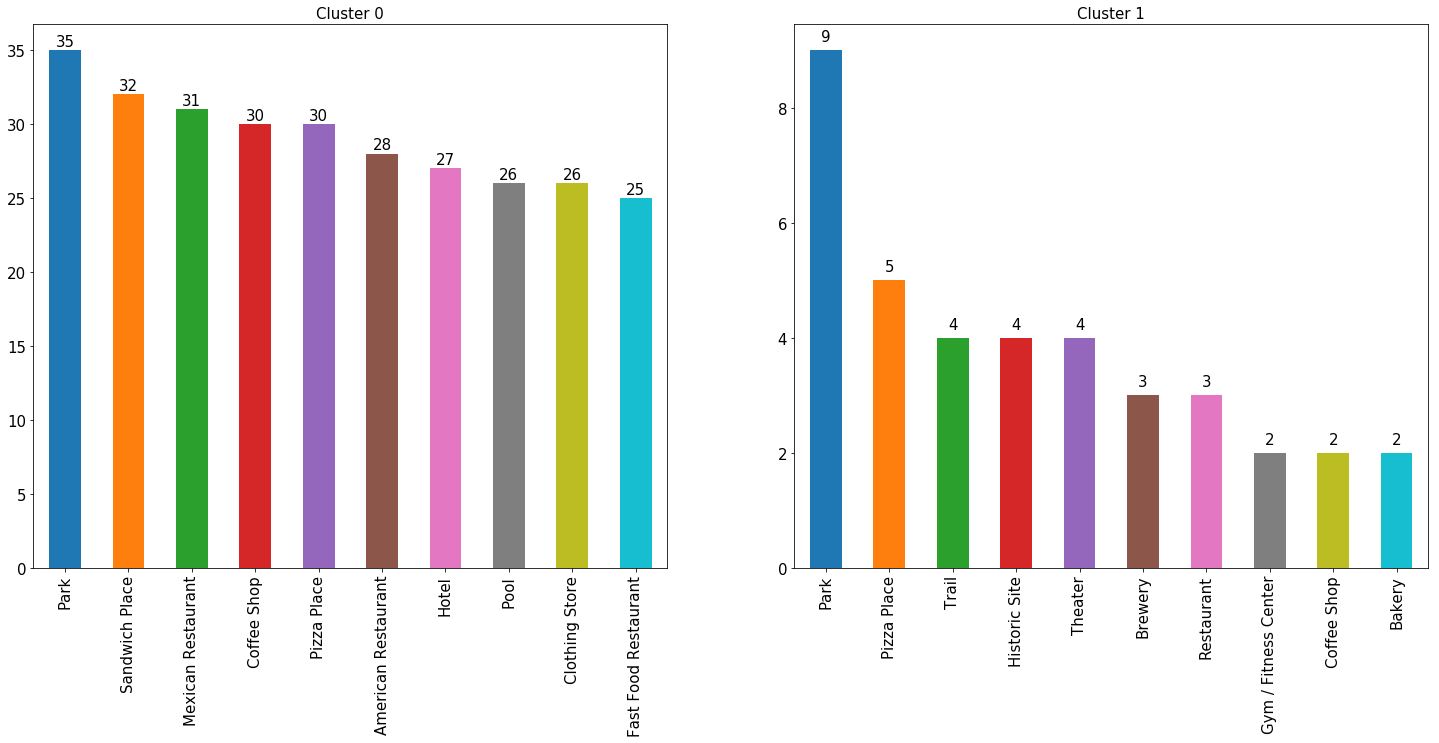

In [66]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (25,10))

for i in range(kclusters):
    data = raleigh_venues_clustered.loc[raleigh_venues_clustered['Cluster_Labels']==i,:]['Venue_Category'].value_counts().head(10)
    data.plot(ax=ax[i],kind='bar',fontsize=15)
    ax[i].set_title('Cluster {}'.format(i),fontsize=15)
    ax[i].set_xticklabels(data.index, rotation='vertical')
    rects = ax[i].patches
    labels = list(data.values)
    for rect,label in zip(rects,labels):
        height = rect.get_height()
        ax[i].text(rect.get_x() + rect.get_width() / 2, height + 0.1, label,
            ha='center', va='bottom',size=15)

plt.show()

From the plots above, we see that among the top ten categories in each of the clusters, the venue categories which may be of interest to visitors like restaurants, shopping stores, etc. are higher in **cluster 0**.

Let's also visualize the venue counts along with the corresponding count of neighborhoods with those venue counts among clusters.

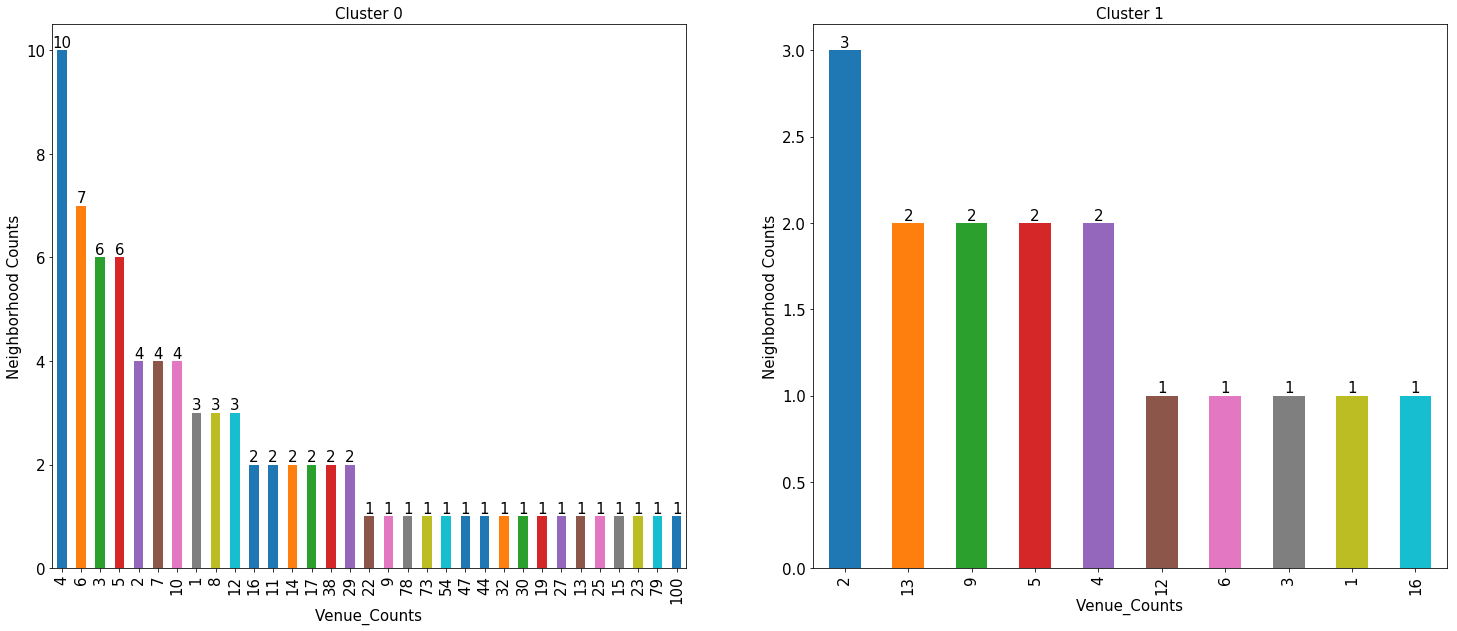

In [85]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize = (25,10))

for i in range(kclusters):
    data = total_counts.loc[total_counts['Cluster_Labels']==i,:]['Venue_Count'].value_counts()
    data.plot(ax=ax[i],kind='bar',fontsize=15)
    ax[i].set_title('Cluster {}'.format(i),fontsize=15)
    ax[i].set_xticklabels(data.index, rotation='vertical')
    ax[i].set_xlabel('Venue_Counts',fontsize=15)
    ax[i].set_ylabel('Neighborhood Counts',fontsize=15)
    rects = ax[i].patches
    labels = list(data.values)
    for rect,label in zip(rects,labels):
        height = rect.get_height()
        ax[i].text(rect.get_x() + rect.get_width() / 2, height, label,
            ha='center', va='bottom',size=15)

plt.show()

From the plots above, we also see that the neighborhoods with higher venue counts(more than or equal to 20) are also present in **cluster 0**. 

Since **Cluster 0** meets our criteria with venue counts **more than or equal to 20** and also has a higher variety of venue categories of interest, we shall proceed with it and further examine the neighborhoods in this cluster.

Let's make a word cloud of neighborhoods in cluster 0 to visualize the neighborhoods with maximum venues.

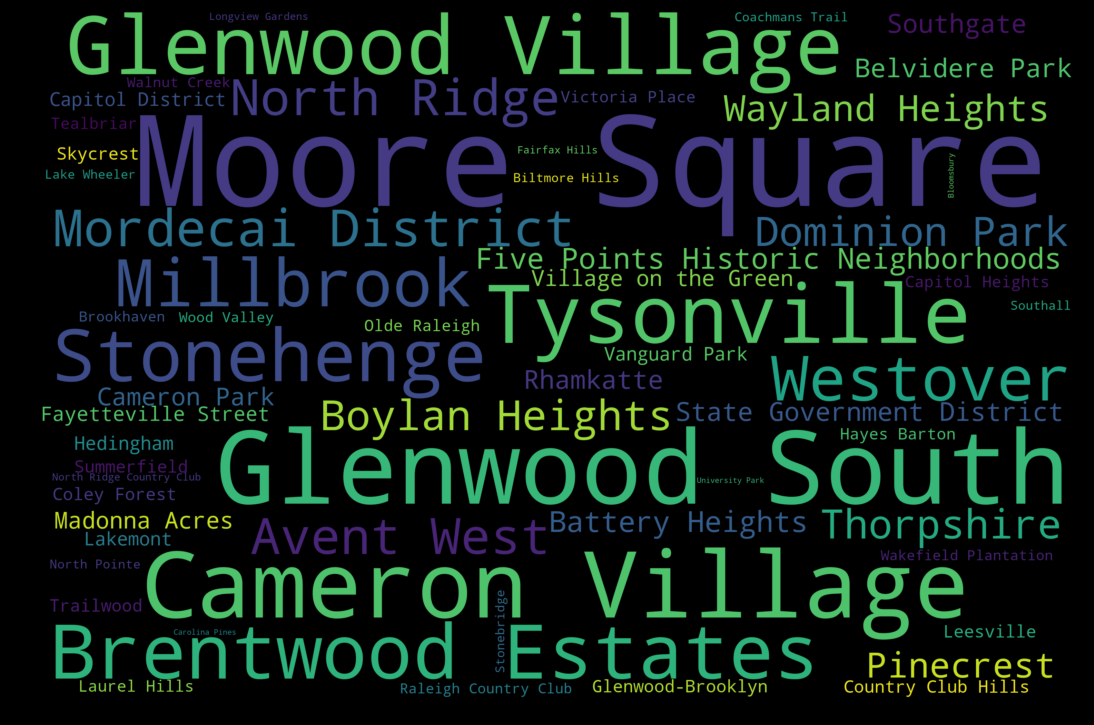

In [87]:
from wordcloud import WordCloud, STOPWORDS
condition1 = raleigh_venues_clustered['Cluster_Labels']==0
condition2 = raleigh_venues_clustered['Hotel_Count']<=3
data = raleigh_venues_clustered.loc[condition1&condition2,:]['Neighbourhood'].value_counts()
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    max_words = 2000,
    background_color = 'black').generate_from_frequencies(data)
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Since we have now identified the cluster, we shall extract the required neighborhoods from it which are those having number of already existing hotels less than or equal to three and nearby venues more than 19.

**Extract the required Neighborhoods**

In [88]:
condition1 = total_counts['Cluster_Labels']==0
condition2 = total_counts['Hotel_Count']<=3
condition3 = total_counts['Venue_Count']>=20
final_locations = total_counts.loc[condition1&condition2&condition3,:]
final_locations

,Cluster_Labels,Region,Neighbourhood,Latitude,Longitude,Hotel_Count,Venue_Count
7,0,Beltline,Cameron Village,35.794548,-78.656789,0.0,38
17,0,Beltline,Glenwood South,35.785436,-78.647354,2.0,47
18,0,Beltline,Glenwood Village,35.792926,-78.645399,0.0,29
25,0,Beltline,Moore Square,35.777559,-78.635786,3.0,78
39,0,North Raleigh,Brentwood Estates,35.829181,-78.593451,3.0,25
63,0,North Raleigh,Stonehenge,35.884593,-78.679962,1.0,23
78,0,West and Southwest Raleigh,Tysonville,35.820706,-78.704727,1.0,29


Thus, these are the final neighborhoods which could be optimal for the location of new hotel. Let's extract the final count of the resulting neighborhoods.

In [125]:
neighborhood_count = len(final_locations)
neighborhood_count

7

Let's visualize the top ten venues in these 7 neighborhoods.

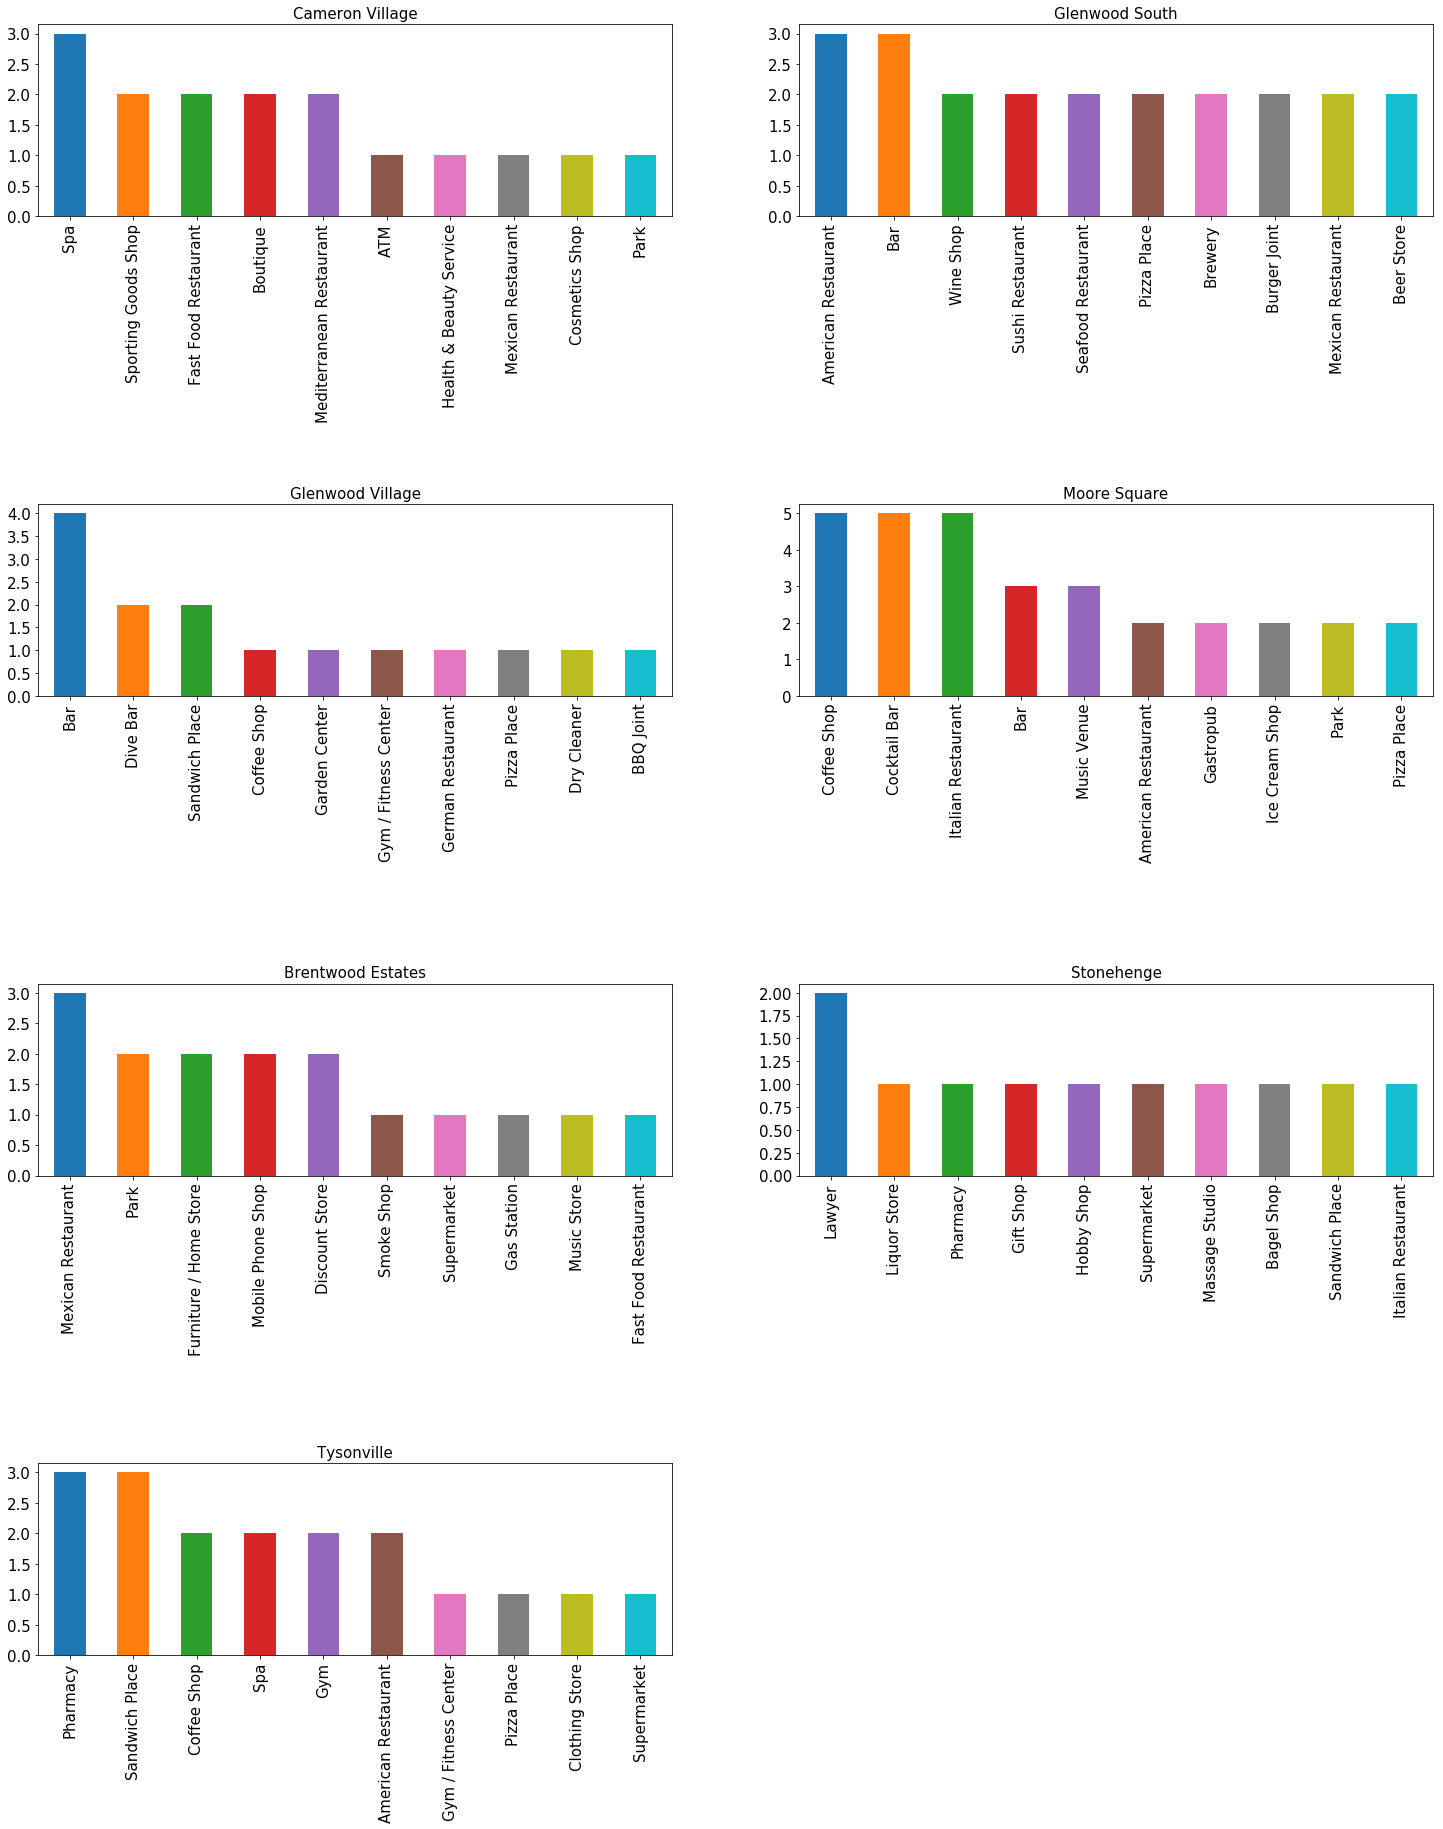

In [90]:
rows = round(neighborhood_count/2)
fig,ax = plt.subplots(nrows=rows, ncols=2, figsize = (25,30))
if neighborhood_count%2!=0:
    fig.delaxes(ax[rows-1,1])
plt.subplots_adjust(wspace=0.2, hspace=1.5)
ax = ax.flatten()

for i,hood in zip(range(final_locations.shape[0]),final_locations['Neighbourhood']):
    data = raleigh_venues_clustered.loc[raleigh_venues_clustered['Neighbourhood']==hood,:]['Venue_Category'].value_counts().head(10)
    data.plot(ax=ax[i],kind='bar',fontsize=15)
    ax[i].set_title(hood,fontsize=15)
    ax[i].set_xticklabels(data.index, rotation='vertical')
plt.show()    

As we can infer from the plots, most of the venues in these neighborhoods are restaurants,bars etc. which are one of the things visitors look for nearby a hotel. Hence, these could be good neighborhoods for the location of hotel.

Let's also visualize these final neighborhoods on a map to see how they are distributed.

In [91]:
# create map
neighborhoods_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
for lat, lon, label in zip(final_locations['Latitude'], final_locations['Longitude'], final_locations['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color= 'blue',
        fill_opacity=0.7,
        parse_html=False).add_to(neighborhoods_map)

neighborhoods_map

As we can see from the map, the neighborhoods are well spread out and thus gives a variety of places that could be considered.

This concludes our analysis. We have identified 7 neighborhoods with lower concentration of hotels and higher concentration of venues and they are spread out in three of the four regions in Raleigh, i.e., Beltline, north Raleigh and west-southwest Raleigh thus giving options for the choice of location of hotel near or between downtown, university or research triangle park. These neighborhoods should serve as the reference point for initiating the ground level exploration of potential hotel location.

## Results and Discussion <a name="results"></a>

Our analysis shows that although the region appears to be saturated at first sight, there are a lot of potential areas which are still developing and given the booming reputation of city as a hub, could be a good investment choice. Although it seems fit to choose downtown or the research triangle park area as the location but given their popularity they might already be fully saturated with the hotels. Besides, as the region keeps growing, the other neighborhoods could be expected to grow and should be taken into consideration. Hence, it becomes necessary to analyze the neighborhoods before reaching to any conclusion. Thus, we extracted the list of all the neighborhoods and explored them in detail further.

We then extracted the list of already existing hotels in a radius of 4000 metres from the center of neighborhoods to cover maximum area detail. We then further extracted the details of number and type of venues present nearby within a radius of 800 metres so as to have data about the things to do at a walking distance.

Once we got this data, we performed clustering on our data to get the similar kinds of neighborhoods in separate clusters like residential neighborhoods, food neighborhoods, etc. We then examined our clusters based on the categories of venues present and their corresponding counts and found the cluster which had a higher concentration of venues which may be of interest to visitors like restaurants, amenities, etc. From that cluster, we then extracted the final list of neighborhoods which had a hotel count of less than or equal to three but nearby venues count of more than 19 and visualized them on the map to assure they are well spread out thus giving choices in separate regions.

This list of neighborhoods and their centers could be used as a starting point for further street-level analysis of the possible locations. This is a potential list and does not imply that these are actually optimal locations for a hotel. There are, of course, other factors like real estate, planned projects, local community laws, hotel sales data of previous quarters, etc. which need to be considered before deciding on the final location. The purpose of this analysis was to only get the possible neighborhood choices for a new hotel and it is possible that regardless of low hotel density, it might not be viable to open a hotel there due to some other reasons. Thus, this recommended list should be considered only as a starting point and if further detailed analysis could be done and more data obtained regarding profits and sales projections, it can lead to getting the best possible location.

## Conclusion <a name="conclusion"></a>

After all the analysis we did, we identified a few neighborhoods which met our criteria of low hotel density and higher nearby venues density which thus befits our purpose of this project. This analysis can aid stakeholders in narrowing down their search for optimal location for a new hotel in the region. There are a lot of other factors which need to be considered for a hotel like capital, financial projections, zoning and permit issues, etc. before a final decision can be taken but a location choice gives a starting point for all these further steps. This analysis can be further improved if more data related to demand, occupancy, revenue, customer surveys could be obtained for the existing hotels in the region but for now, should be contributory towards exploring few good choices.
